<a href="https://colab.research.google.com/github/hussain0048/Projects-/blob/master/Building_a_Real_Time_Emotion_Detection_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a Real Time Emotion Detection with Python
# **Introduction:**

Detecting real-time emotion of the person with a camera input is one of the advanced features in the machine learning process. The detection of emotion of a person using a camera is useful for various research and analytics purposes. The detection of emotion is made by using the machine learning concept. You can use the trained dataset to detect the emotion of the human being. For detecting the different emotions, first you need to train those different emotions, or you can use a dataset already available on the internet. In this article, we will discuss creating a Python program to detect real-time emotion of a human being using the camera '[1].

# 1-Installing Dependencies 

In [1]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install tensorflow 

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install numpy 

Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install pandas  

Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install keras  

Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip install adam  

Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install kwargs  

ERROR: Could not find a version that satisfies the requirement kwargs (from versions: none)
ERROR: No matching distribution found for kwargs
Note: you may need to restart the kernel to use updated packages.


In [8]:
%pip install cinit  
%pip install np_utils


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# 1 **Training the Dataset**#

For training purposes, I use the predefined un trained dataset CSV file as my main input for my input for training the machine. You can use the code given below for training the machine using the dataset. Before that, you need to ensure that all required files in the same repository where the program presents otherwise it will through some error. You can download the data set by clicking here.

# 2 - **Import library** 


In [9]:
import sys, os  
import pandas as pd  
import numpy as np 

In [20]:
from keras.models import Sequential  
from keras.layers import Dense, Dropout, Activation, Flatten  
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D  
from keras.losses import categorical_crossentropy  
from keras.optimizers import Adam  
from keras.regularizers import l2  
import np_utils  
from tensorflow.keras.utils import to_categorical
# pd.set_option('display.max_rows', 500)  
# pd.set_option('display.max_columns', 500)  
# pd.set_option('display.width', 1000)  

#2 - **Load Dataset** # 
The both training and evaluation operations would be handled with Fec2013 dataset. Compressed version of the dataset takes 92 MB space whereas uncompressed version takes 295 MB space. There are 28K training and 3K testing images in the dataset. Each image was stored as 48×48 pixel. The pure dataset consists of image pixels (48×48=2304 values), emotion of each image and usage type (as train or test instance)[2].

In [ ]:
# this code is used to upload dataset from Pc to colab
from google.colab import files # Please First run this cod in chrom 
def getLocalFiles():
    _files = files.upload() # upload StudentNextSessionf.csv datase
    if len(_files) >0: # Then run above  libray 
       for k,v in _files.items():
         open(k,'wb').write(v)
getLocalFiles()

Saving la.jfif to la.jfif


In [16]:
!wget -N https://www.kaggle.com/deadskull7/fer2013

--2024-07-20 19:40:50--  https://www.kaggle.com/deadskull7/fer2013
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /datasets/deadskull7/fer2013 [following]
--2024-07-20 19:40:50--  https://www.kaggle.com/datasets/deadskull7/fer2013
Reusing existing connection to www.kaggle.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘fer2013’

fer2013                 [ <=>                ]   8.76K  --.-KB/s    in 0.004s  

Last-modified header missing -- time-stamps turned off.
2024-07-20 19:40:50 (2.36 MB/s) - ‘fer2013’ saved [8974]



In [11]:
df=pd.read_csv('./fer2013.csv') 

#2-Data Description 

In [12]:
print(df.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB
None


In [13]:
print(df["Usage"].value_counts())  

Usage
Training       28709
PublicTest      3589
PrivateTest     3589
Name: count, dtype: int64


In [14]:
print(df.head())

   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training


# 3- **Data Spliting**

In [15]:
X_train,train_y,X_test,test_y=[],[],[],[]  

for index, row in df.iterrows():  
    val=row['pixels'].split(" ")  
    try:  
        if 'Training' in row['Usage']:  
           X_train.append(np.array(val,'float32'))  
           train_y.append(row['emotion'])  
        elif 'PublicTest' in row['Usage']:  
           X_test.append(np.array(val,'float32'))  
           test_y.append(row['emotion'])  
    except:  
        print(f"error occured at index :{index} and row:{row}") 

In [16]:
num_features = 64  
num_labels = 7  
batch_size = 64  
epochs = 30  
width, height = 48, 48

In [17]:
X_train = np.array(X_train,'float32')  
train_y = np.array(train_y,'float32')  
X_test = np.array(X_test,'float32')  
test_y = np.array(test_y,'float32')  

In [21]:
train_y=to_categorical(train_y, num_classes=num_labels)  
test_y=to_categorical(test_y, num_classes=num_labels) 

#4- **Normalizing data between 0 and 1** 

In [22]:
X_train -= np.mean(X_train, axis=0)  
X_train /= np.std(X_train, axis=0)  
X_test -= np.mean(X_test, axis=0)  
X_test /= np.std(X_test, axis=0)  
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)  
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1) 

# 5- **Designing the CNN**


##5.1- **1st convolution layer**

In [23]:
model = Sequential()  
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(X_train.shape[1:])))  
model.add(Conv2D(64,kernel_size= (3, 3), activation='relu'))  
# model.add(BatchNormalization())  
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))  
model.add(Dropout(0.5))  

/home/ali/Desktop/project/Emotion Detection/venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 5.2 - **2nd Convolution Layer**

In [24]:
model.add(Conv2D(64, (3, 3), activation='relu'))  
model.add(Conv2D(64, (3, 3), activation='relu'))  
# model.add(BatchNormalization())  
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))  
model.add(Dropout(0.5)) 

## 5.3- **3rd Convolution Layer**

In [25]:
model.add(Conv2D(128, (3, 3), activation='relu'))  
model.add(Conv2D(128, (3, 3), activation='relu'))  
# model.add(BatchNormalization())  
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))  
model.add(Flatten())  

##5.4-  **Fully connected neural network**

In [26]:
model.add(Dense(1024, activation='relu'))  
model.add(Dropout(0.2))  
model.add(Dense(1024, activation='relu'))  
model.add(Dropout(0.2))  
model.add(Dense(num_labels, activation='softmax'))  
# model.summary()  

#**6-Training**

##**6.1 Method1 Generator [2]**
We can train the network. To complete the training in less time, I prefer to implement learning with randomly selected trainset instances. That is the reason why train and fit generator used. Also, loss function would be cross entropy because the task is multi class classification [2]

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
import keras
import keras.utils
from keras import utils as np_utils

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator()
train_generator = gen.flow(X_train, train_y, batch_size=batch_size)
model.compile(loss='categorical_crossentropy'
, optimizer=keras.optimizers.Adam()
, metrics=['accuracy']
)
model.fit(train_generator, steps_per_epoch=batch_size, epochs=epochs)

Epoch 1/30


/home/ali/Desktop/project/Emotion Detection/venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


64/64 ━━━━━━━━━━━━━━━━━━━━ 14s 192ms/step - accuracy: 0.2145 - loss: 1.8497
Epoch 2/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 15s 231ms/step - accuracy: 0.2548 - loss: 1.8150
Epoch 3/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 17s 260ms/step - accuracy: 0.2600 - loss: 1.7902
Epoch 4/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 17s 273ms/step - accuracy: 0.2475 - loss: 1.7667
Epoch 5/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 19s 294ms/step - accuracy: 0.2873 - loss: 1.7393
Epoch 6/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 16s 256ms/step - accuracy: 0.3228 - loss: 1.6918
Epoch 7/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 16s 256ms/step - accuracy: 0.3445 - loss: 1.6415
Epoch 8/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step - accuracy: 0.4062 - loss: 1.6357 
Epoch 9/30


2024-07-20 19:52:31.868017: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


64/64 ━━━━━━━━━━━━━━━━━━━━ 16s 245ms/step - accuracy: 0.3467 - loss: 1.6109
Epoch 10/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 16s 247ms/step - accuracy: 0.3830 - loss: 1.5620
Epoch 11/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 18s 280ms/step - accuracy: 0.4011 - loss: 1.5334
Epoch 12/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 18s 285ms/step - accuracy: 0.3972 - loss: 1.5316
Epoch 13/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 18s 287ms/step - accuracy: 0.4166 - loss: 1.4985
Epoch 14/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 17s 267ms/step - accuracy: 0.4472 - loss: 1.4394
Epoch 15/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 17s 270ms/step - accuracy: 0.4397 - loss: 1.4590
Epoch 16/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 148us/step - accuracy: 0.4375 - loss: 1.3165 
Epoch 17/30


2024-07-20 19:54:32.638038: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


64/64 ━━━━━━━━━━━━━━━━━━━━ 17s 270ms/step - accuracy: 0.4322 - loss: 1.4410
Epoch 18/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 17s 267ms/step - accuracy: 0.4420 - loss: 1.4386
Epoch 19/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 17s 268ms/step - accuracy: 0.4561 - loss: 1.4134
Epoch 20/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 17s 269ms/step - accuracy: 0.4533 - loss: 1.3936
Epoch 21/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 17s 265ms/step - accuracy: 0.4568 - loss: 1.4056
Epoch 22/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 17s 268ms/step - accuracy: 0.4933 - loss: 1.3562
Epoch 23/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 17s 269ms/step - accuracy: 0.4785 - loss: 1.3541
Epoch 24/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 156us/step - accuracy: 0.5469 - loss: 1.2454 
Epoch 25/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 17s 264ms/step - accuracy: 0.4765 - loss: 1.3513
Epoch 26/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 17s 268ms/step - accuracy: 0.4883 - loss: 1.3410
Epoch 27/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 17s 264ms/step - accuracy: 0.4848 - loss: 1.3503
Epoch 28/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 17s 2

##6.2-**Method 2 Compliling the model**

In [31]:
model.compile(loss=categorical_crossentropy,  
              optimizer=Adam(),  
              metrics=['accuracy'])  

In [32]:
model.fit(X_train, train_y,  
          batch_size=batch_size,  
          epochs=epochs,  
          verbose=1,  
          validation_data=(X_test, test_y),  
          shuffle=True)  

Epoch 1/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 122s 269ms/step - accuracy: 0.4990 - loss: 1.2975 - val_accuracy: 0.5088 - val_loss: 1.2579
Epoch 2/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 126s 280ms/step - accuracy: 0.5169 - loss: 1.2604 - val_accuracy: 0.5358 - val_loss: 1.2122
Epoch 3/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 125s 277ms/step - accuracy: 0.5266 - loss: 1.2307 - val_accuracy: 0.5244 - val_loss: 1.2144
Epoch 4/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 124s 276ms/step - accuracy: 0.5366 - loss: 1.2079 - val_accuracy: 0.5400 - val_loss: 1.1976
Epoch 5/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 124s 275ms/step - accuracy: 0.5506 - loss: 1.1728 - val_accuracy: 0.5450 - val_loss: 1.1875
Epoch 6/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 124s 275ms/step - accuracy: 0.5622 - loss: 1.1472 - val_accuracy: 0.5355 - val_loss: 1.2105
Epoch 7/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 111s 246ms/step - accuracy: 0.5643 - loss: 1.1377 - val_accuracy: 0.5506 - val_loss: 1.1685
Epoch 8/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 102s 227ms/step - accuracy: 0.5761 -

#7-**Saving the  model**

In [34]:
fer_json = model.to_json()  
with open("fer.json", "w") as json_file:  
    json_file.write(fer_json)  
model.save_weights("fer.weights.h5") 

#8-**Evaluate model [2]**

In [ ]:
train_score = model.evaluate(X_train, train_y, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1])
test_score = model.evaluate(X_test, test_y, verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', 100*test_score[1])

# **9-Confusion Matrix**[2]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
 
pred_list = []; actual_list = []
 
for i in predictions:
  pred_list.append(np.argmax(i))
 
for i in Y_test:
  actual_list.append(np.argmax(i))
 
confusion_matrix(actual_list, pred_list)
Testing

#**10-Testing**[2]

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


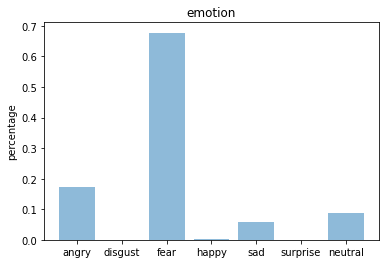

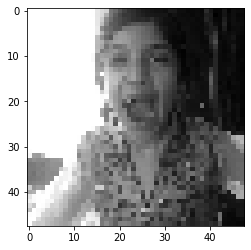

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from matplotlib import pyplot as plt
img = image.load_img("la.jfif", grayscale=True, target_size=(48, 48))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
x /= 255
custom = model.predict(x)
emotion_analysis(custom[0])
x = np.array(x, 'float32')
x = x.reshape([48, 48]);
plt.gray()
plt.imshow(x)
plt.show()

Emotions stored as numerical as labeled from 0 to 6. Keras would produce an output array including these 7 different emotion scores. We can visualize each prediction as bar chart.

In [ ]:
def emotion_analysis(emotions):
  objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
  y_pos = np.arange(len(objects))
  plt.bar(y_pos, emotions, align='center', alpha=0.5)
  plt.xticks(y_pos, objects)
  plt.ylabel('percentage')
  plt.title('emotion')
  plt.show()

#**11-Detecting Real-Time Emotion**

In [ ]:
import os  
import cv2  
import numpy as np  
from keras.models import model_from_json  
from keras.preprocessing import image  

In [ ]:
#load model  
model = model_from_json(open("fer.json", "r").read())  
#load weights  
model.load_weights('fer.h5') 

In [ ]:
face_haar_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')  

In [ ]:
cap=cv2.VideoCapture(0)  

In [ ]:
cap=cv2.VideoCapture(0)  
while True:  
    ret,test_img=cap.read()# captures frame and returns boolean value and captured image  
    #if not ret:  
        #continue  
    gray_img= cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)  

    faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)  


    for (x,y,w,h) in faces_detected:  
        cv2.rectangle(test_img,(x,y),(x+w,y+h),(255,0,0),thickness=7)  
        roi_gray=gray_img[y:y+w,x:x+h]#cropping region of interest i.e. face area from  image  
        roi_gray=cv2.resize(roi_gray,(48,48))  
        img_pixels = image.img_to_array(roi_gray)  
        img_pixels = np.expand_dims(img_pixels, axis = 0)  
        img_pixels /= 255  

        predictions = model.predict(img_pixels)  

        #find max indexed array  
        max_index = np.argmax(predictions[0])  

        emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')  
        predicted_emotion = emotions[max_index]  

        cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)  

    resized_img = cv2.resize(test_img, (1000, 700))  
    cv2.imshow('Facial emotion analysis ',resized_img)  



    if cv2.waitKey(10) == ord('q'):#wait until 'q' key is pressed  
        break  

cap.release()  
cv2.destroyAllWindows  

References:

[1] Building a Real Time Emotion Detection with Python

https://morioh.com/p/801c509dda99?f=5c21f93bc16e2556b555ab2f

[2] Facial Expression Recognition with Keras
http://sefiks.com/2018/01/01/facial-expression-recognition-with-keras/

[3] Machine Learning Project | Facial Emotion Detection | part 2 Creating Webapp using Flask

https://www.youtube.com/watch?v=2mN7ygkc2XU&feature=youtu.be&fbclid=IwAR35sBAYwEakprFrmi12-4wW_54COtb8hcXdEdlCJjQ_en2JCi4zRA28bSs

